# The OLG model

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population is non constant and grows by the exogenous growth rate n. A life consists of
two periods, *young* and *old*.

Population is given as:

$L_{t+1} = (1+n)L_{t}$

**Productivity:** Productivity is non constant and grows by the exogenous growth rate g. Productivity is given as:

$A_{t+1} = (1+g)A_{t}$

**Households:** Young households supply labor exogenously and earns a  wage $w_{t}A_t$. <br>
Consumption as young and old are denoted by $C_{1t}$ and $C_{2t+1}$. The return on saving is $r_{t+1}$.<br>
Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}w_{t}A_{t}L_{t}\\
 & C_{1t}=w_{t}A_{t}L_{t}-S_{t} \\
 & C_{2t+1}=(1+r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$. $\beta$ denotes the time preference of consumption. That is. Does the consumer prefer consumption when they are young or old.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $L_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}=F(K_{t-1},A_{t}L_{t})=\alpha K_{t-1}^{\alpha-1}+(1-\alpha)(A_{t}L_{t})^{-\alpha},\,\,\,\alpha\in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}A_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

And they will seek to maximize this profit

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $L_{t} = N_{t}$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+I_{t}$
6. Asset market clears: $S_{t}= K_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

### 1.1. <a id='toc1_1_'></a>[Solution and simulation](#toc0_)

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},L_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{L}(K_{t-1},L_{t})=(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.<br>
*Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{L}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
C_{2t} & =(1+{r}_{t})(K_{t-1})\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Solution algorithm:** Simulate forward choosing $s_{t}$ so
that we always have

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Implementation:**

1. Use a bisection root-finder to determine $s_t$
2. Low $s_t$: A lot of consumption today. Low marginal utility. LHS < RHS.
3. High $s_t$: Little consumption today. High marginal utility. LHS > RHS.
4. Problem: Too low $s_t$ might not be feasible if $B_t > 0$.

**Note:** Never errors in the Euler-equation due to *perfect foresight*.

## Our extension to the model

The model we seek to simulate is the OLG model, which has also been observed in the lectures. We have extended the model by introducing growth in productivity as well as growth in population. To narrow down the simulation process in the start it has been decided that only cobb douglas production functions will be observed. The CES function will be checked later but without an analytical solution. 

The analysis will have the following approach:
1. The analytical solution will be found using the theoretical solution under assumption of log utilities, cobb douglas production and no government and compared to the analytical solution found using sympy
2. Observing K, L and A as an argument for observing relative terms (capital per effective worker)
3. We will observe our extended model in relative terms benchmarked against the analytical solution
4. A check for the effects of changing to CES production function and adding taxes


But first lets do the basic imports of classes and functions.

In [71]:
import numpy as np
from scipy import optimize
import sympy as sm

# plotting
import matplotlib.pyplot as plt 
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"}) # set grid style
plt.rcParams.update({'font.size': 14})


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from Modelproject2 import OLGModelClass #Call class containing full model


model = OLGModelClass() # Create instance of model class
from Modelproject2 import plotKLA, plotSS, steady_state # Call functions from model class

par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing the model:
calling .setup()
calling .allocate()


**Theoretical and analytical solution**


Before introducing anything further we wish to solve the model analytically and compare this to a simulation. Under the assumption of log utility and Coubb Doglas production function we get the following as our steady state:

$k^* = \frac{1-\alpha}{(1+n)(1+g)(1+\frac{1}{\beta})}^{\frac{1}{1-\alpha}}$

The validity of this formula will be checked using sympy but for now we have created the function annakss() which calculates the steady state value for k, aka capital per effective worker. The state state value is:

In [72]:
model.annakss()

0.16029785719864117

As such we calculate the theoretical capital per effective worker to 0.16. This will be included into future plots to see if our simulations hits the wanted values

Next up we check if Sympy agrees with our formulation of the steady state. 

In [73]:
steady_state()

the analytical steady state will be derived from the capital accumulation formula seen below:


Eq(k, k**alpha*(1 - alpha)/((2 + (1 - beta)/beta)*(g + 1)*(n + 1)))

From this the steady state formula of capital, k_ss, is derived using sympy


((-beta*g*n - beta*g - beta*n - beta - g*n - g - n - 1)/(beta*(alpha - 1)))**(1/(alpha - 1))

For alpha = 0.3;
beta = 0.7142857142857143;
n = 0.02;
g = 0.03;
Steady state value of capital, k_ss =


0.16029785719864112

As it can be seen above Sympy fully agrees with the theoretical steady state. 

**Numerical simulation of our model**
Now we wish to simulate the model. First off by running the code below this simulation is executed and plots of non relative variables are created. Relevant variables for now are Capital, Labor and Productivity.

simulation done in 0.02 secs


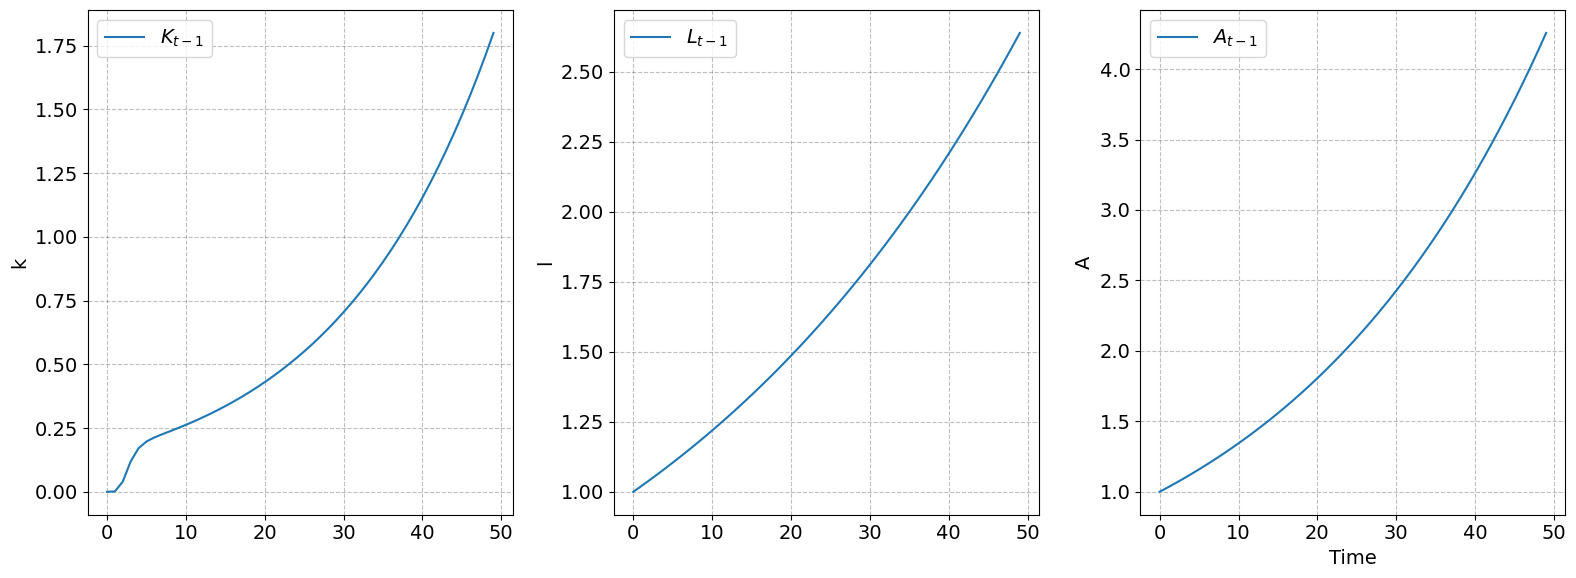

In [74]:
model.simulate()
plotKLA(model.sim.K_lag,model.sim.L_lag,model.sim.A_lag)

As seen above all of these diverge but the sharp eye will notice, that the growth in capital approaches the combined growth of labour and productivity and thus relative terms will be observed. This can be seen below using the plotSS function which takes the capital per effective worker and compares it to the theoretical steady state

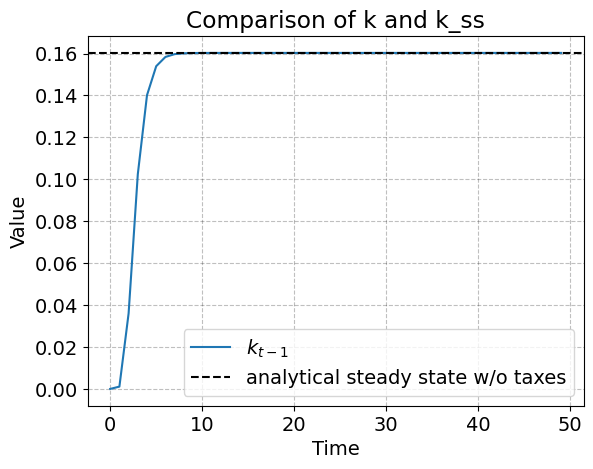

In [75]:
plotSS(model.sim.k_lag,model.annakss())

What we see here is that our model succesfully converges towards the theoretical steady state. The convergance happens rather fast which implies that the model could've successfully been simulated using fewer than 50 iterations. 

**Addition of taxes and change of production function**

As a further "extension" to the model we have decided to check is how taxes and the change to CES production function changes the results numerically. We will not solve an analytic steady state for this as its a bit complicated. The only extension here is the inclusion of productivity and labour growth. 

initializing the model:
calling .setup()
calling .allocate()
simulation done in 0.02 secs


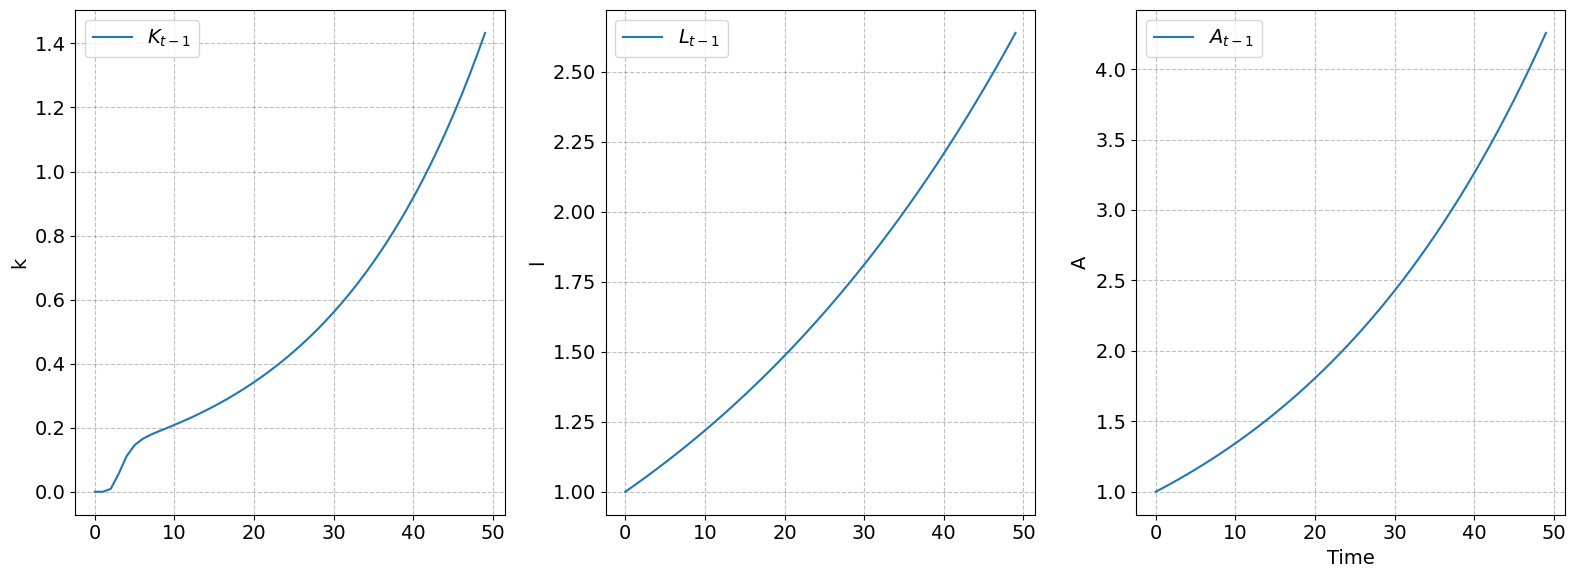

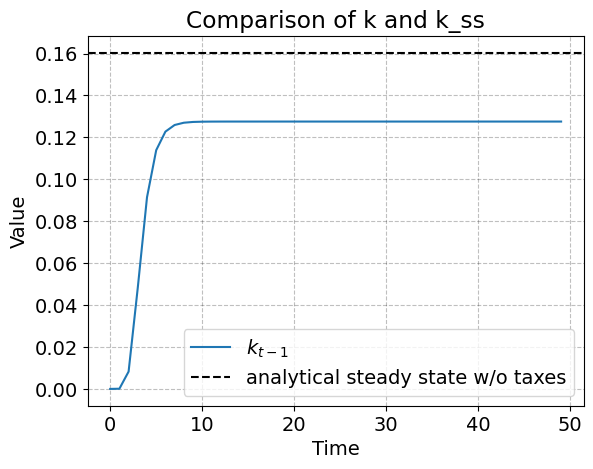

In [76]:
NewModel = OLGModelClass() # Create instance of model class
par2 = NewModel.par # SimpeNamespace
sim2 = NewModel.sim # SimpeNamespace   

#´redefining parameters
par2.production_function = 'ces'
par2.theta = 0.05
par2.tau_w = 0.1
par2.tau_r = 0.1

NewModel.simulate()

plotKLA(NewModel.sim.K_lag,NewModel.sim.L_lag,NewModel.sim.A_lag)
plotSS(NewModel.sim.k_lag, model.annakss())

As seen above the inclusion of taxes means that the steady state level for capital falls significantly from the previous steady state. This is expected since we havent included any direct recievers of these taxes. 

# Conclusion

We can conclude that our model successfully simulated the OLG model with the inclusion of productivity growth and labour growth. We have also successfully incorporated these changed into both the cobb douglas production function as well as the CES production function and proved the convergence of the model.